*Bài giới thiệu* **"Segmentation Gym"** *một phần mềm giúp xây dựng và thử nghiệm nhanh các mô hình phân đoạn ảnh địa chất dựa trên mạng UNet.*

github: https://github.com/Doodleverse/segmentation_gym

**Segmentation Gym** cung cấp một **pipeline Data-model** bao gồm **4 giai đoạn** chính:

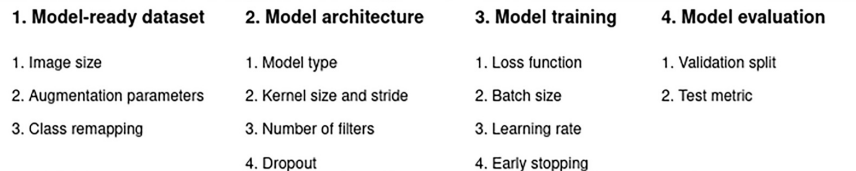

# Model-Ready Data Set

1️⃣ Enter the **path to the images, labels** and **place to store** the output files.

* Hỗ trợ ảnh **3 channel (RGB)**, và **1 channel** (phổ, siêu phổ hoặc dải dữ liệu địa-vật lý), hoặc kết hợp cả **1-3 channel**

2️⃣ **Standardized**

$$ X_{std} = \frac{X - \mu}{\sigma} $$

3️⃣ **Resize**

* **Resize** both images and label to the **target dimension**
* Need larger: zero-padded
* Need smaller: shrunk then zero-padded

4️⃣ **Remapped** (optional)

Label, Encode lại class nếu cần thiếu (Có thể tách hoặc gộp các lớp)

5️⃣ **Augmentation** (optional)

*creates transformed version of the data*:
* rotation
* width
* height shift
* zoom
* vertical/ horizontal flips

> **Output**: Tensorflow Dataset hoặc Numpy npz

# Model building

*Sử dụng 2 họ chính: U-Net và Res U-Net*

**U-Net**

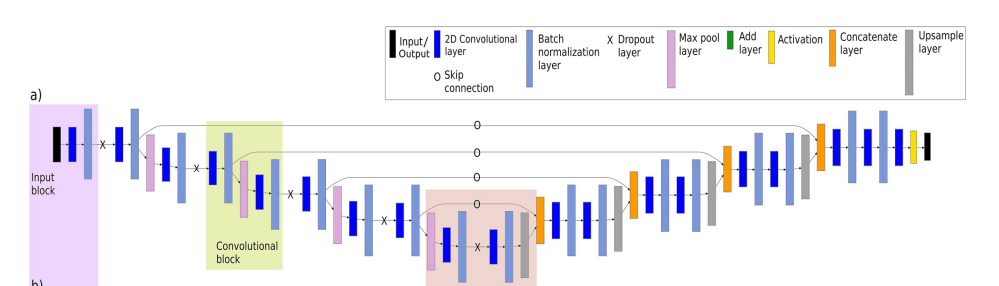

**Res U-Net**

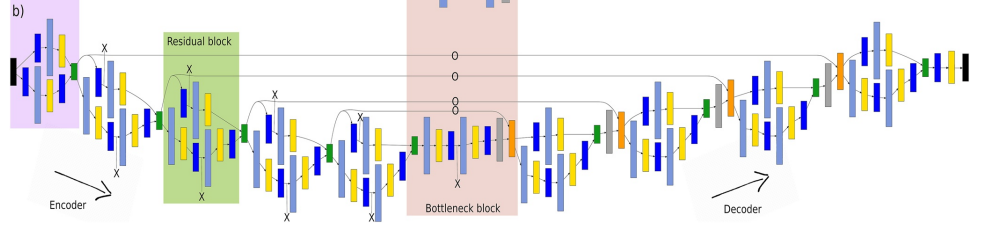

**⭐️Đặc điểm U-Net**:
* Hoàn toàn tích chập (**fully convolutional**), không chứa lớp kết nối đầy đủ (fully connected layers) nào 
* **4 convolutional blocks**, mỗi block: **convolutional layers, Batch Normalization layers** connected by **ReLU** activations, **Dropout** (Optional)
* Mạng hình chữ "U"
* **Skip connection**: Cho phép thông tin từ nhánh **mã hóa truyền trực tiếp đến nhánh giải mã** tương ứng

**🌟 Res U-Net**:
* Tương tự **U-Net**
* **Khác biệt**: Đầu ra của mỗi tầng convolution được **cộng trực tiếp với đầu vào** trước khi đưa qua activation function (ReLU):
$$ y = f(x) + x $$

**🔗Architecture**:
* **Encoder**:
    * Chứa nhiều tầng convolutional để trích xuất đặc trưng
    * Sử dụng batch normalization, ReLU, pooling để giảm kích thước
* **Bottleneck**:
    * Lầ tầng sâu nhất, chứa các đặc trưng quan trọng nhất của ảnh đầu vào
* **Decoder**:
    * Dùng **upsampling** và **convolution** để khôi phục kích thước
    * Có **Skip connection** giúp kết hợp thông tin từ Encoder để tái tạo chính xác 

**⚙️Điều chỉnh kiến trúc mô hình**:
* Kernel
* Regularizing
* Filter
* stride length
* Dropout

# Model Training

* **Adam Optimizer**

* Variables specified in the configuration file:
    * **batch size** (recommend using the largest, available GPU memory allow)
    * **loss function** (mean Dice, Categorical Cross-entropy (**CCE**), Kullback-Leibler distance (**KLD**))
    * **learning rate**: Initial 

* **Learning Rate Scheduler**: specific learning rate như 1 hàm theo số epoch huấn luyện tuần tự:
    * Bắt đầu với giá trị nhỏ
    * Tăng nhanh đến tối đa
    * Giảm theo hàm mũ

* **Early stopping**: Model training stopped early when the validation loss didn't improve upon its previous best value for **10 epochs**.

# Model Evaluation

* mean IoU
* KLD

*Nêu rõ ra từng metric*

# trang 6